## Plots from DEG hits post Seurat + Metascape analysis

#### These csvs were produced by seurat where i already filtered the p_val_adj < 0.01

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#file paths for 4 cell types
degs_fast2B_upreg_path = '/Users/Akanksha/JugnuLab/data_analysis/datasets/snRNA_ERCC1_KO_MF/DEG_pathway_analysis/deg_KO_group/FastIIB/FastIIB_upregulated_KO_DEGs.csv'
degs_fast2X_upreg_path = '/Users/Akanksha/JugnuLab/data_analysis/datasets/snRNA_ERCC1_KO_MF/DEG_pathway_analysis/deg_KO_group/FastIIX/FastIIX_upregulated_KO_DEGs.csv'
degs_faps_upreg_path = '/Users/Akanksha/JugnuLab/data_analysis/datasets/snRNA_ERCC1_KO_MF/DEG_pathway_analysis/deg_KO_group/FAPs/FAPs_upregulated_KO_DEGs.csv'
degs_musc_upreg_path = '/Users/Akanksha/JugnuLab/data_analysis/datasets/snRNA_ERCC1_KO_MF/DEG_pathway_analysis/deg_KO_group/MuSc/MuSc_upregulated_KO_DEGs.csv'
degs_fast2B_downreg_path = '/Users/Akanksha/JugnuLab/data_analysis/datasets/snRNA_ERCC1_KO_MF/DEG_pathway_analysis/deg_KO_group/FastIIB/FastIIB_downregulated_KO_DEGs.csv'
degs_fast2X_downreg_path = '/Users/Akanksha/JugnuLab/data_analysis/datasets/snRNA_ERCC1_KO_MF/DEG_pathway_analysis/deg_KO_group/FastIIX/FastIIX_downregulated_KO_DEGs.csv'
degs_faps_downreg_path = '/Users/Akanksha/JugnuLab/data_analysis/datasets/snRNA_ERCC1_KO_MF/DEG_pathway_analysis/deg_KO_group/FAPs/FAPs_downregulated_KO_DEGs.csv'
degs_musc_downreg_path = '/Users/Akanksha/JugnuLab/data_analysis/datasets/snRNA_ERCC1_KO_MF/DEG_pathway_analysis/deg_KO_group/MuSc/MuSc_downregulated_KO_DEGs.csv'

In [39]:
# load DEGs (M+F DEG between KO and Wt) csv in pandas
#set path variable
path_degs = degs_musc_downreg_path
cell_type_str = 'MuSc'
color_str = 'skyblue'
degs = pd.read_csv(path_degs, header=0) #header is present
deg_names = degs['Unnamed: 0']
deg_significance = degs['p_val_adj']
deg_log2fc = degs['avg_log2FC']

#convertlog2FC to ratio of fold change by exponentiating with base 2
degs['avg_FC'] = 2**degs['avg_log2FC']



### Fold change plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


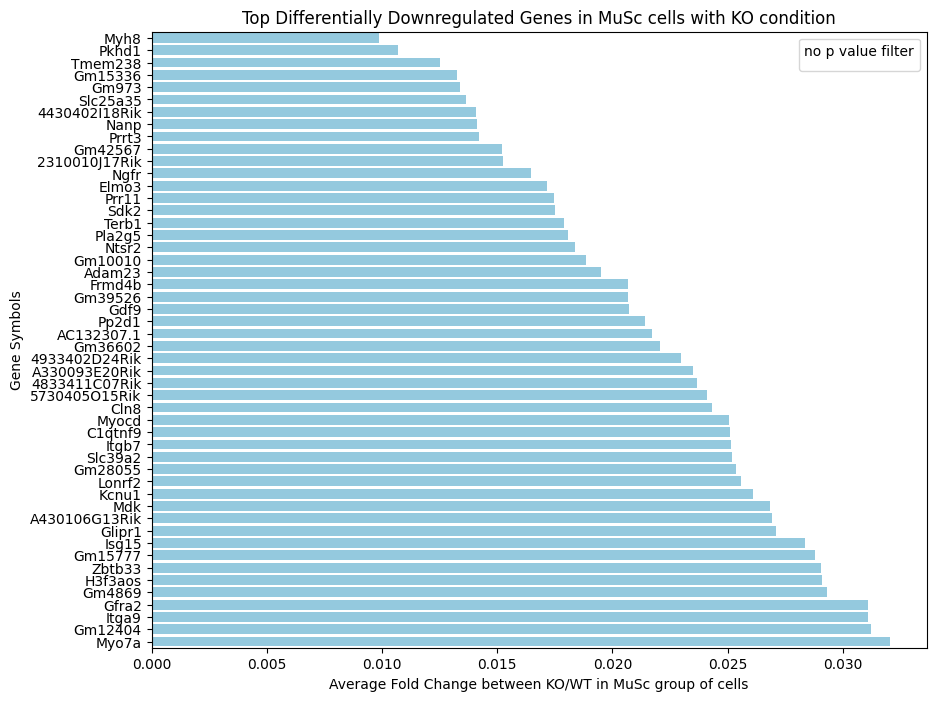

In [40]:
# plotting code
# order the genes by fold change (up and down sorting)
degs = degs.sort_values('avg_FC', ascending=True)
# get the top 50 genes
degs_top_50_genes = degs.iloc[:50]

fold_change = degs_top_50_genes['avg_FC']
gene_names = degs_top_50_genes['Unnamed: 0']
#set all bar colors to be light blue
colors = [color_str] * 50

# plot the bar plot 
plt.figure(figsize=(10, 8))
sns.barplot(x=fold_change, y=gene_names, palette=colors)
plt.xlabel(f"Average Fold Change between KO/WT in {cell_type_str} group of cells")
plt.ylabel('Gene Symbols')
plt.title(f"Top Differentially Downregulated Genes in {cell_type_str} cells with KO condition")
#add legend to state the p value filter
plt.legend(title='no p value filter')
plt.show()

### Common DEGs between FastIIB and FastIIX

In [56]:
# find DEGs that are common in fast2B and fast2X cells
# load DEGs Fast2B and Fast2X
path_degs_fast2B = degs_fast2B_upreg_path
path_degs_fast2X = degs_fast2X_upreg_path
degs_fast2B = pd.read_csv(path_degs_fast2B, header=0) #header is present
degs_fast2X = pd.read_csv(path_degs_fast2X, header=0) #header is present
deg_names_fast2B = degs_fast2B['Unnamed: 0']
deg_names_fast2X = degs_fast2X['Unnamed: 0']

#convertlog2FC to ratio of fold change by exponentiating with base 2
degs_fast2B['avg_FC'] = 2**degs_fast2B['avg_log2FC']
degs_fast2X['avg_FC'] = 2**degs_fast2X['avg_log2FC']

#find common genes from matching gene names
common_genes = deg_names_fast2B[deg_names_fast2B.isin(deg_names_fast2X)]
print(f"Number of common genes between Fast2B and Fast2X: {len(common_genes)}")
print(common_genes.head(10))



Number of common genes between Fast2B and Fast2X: 26
0       Arrdc2
14        Pdk4
15      Cyfip2
16       Fndc9
19       Fkbp5
22       Nr4a1
29        Tob2
30        Glul
34    Slc25a25
39        Per1
Name: Unnamed: 0, dtype: object


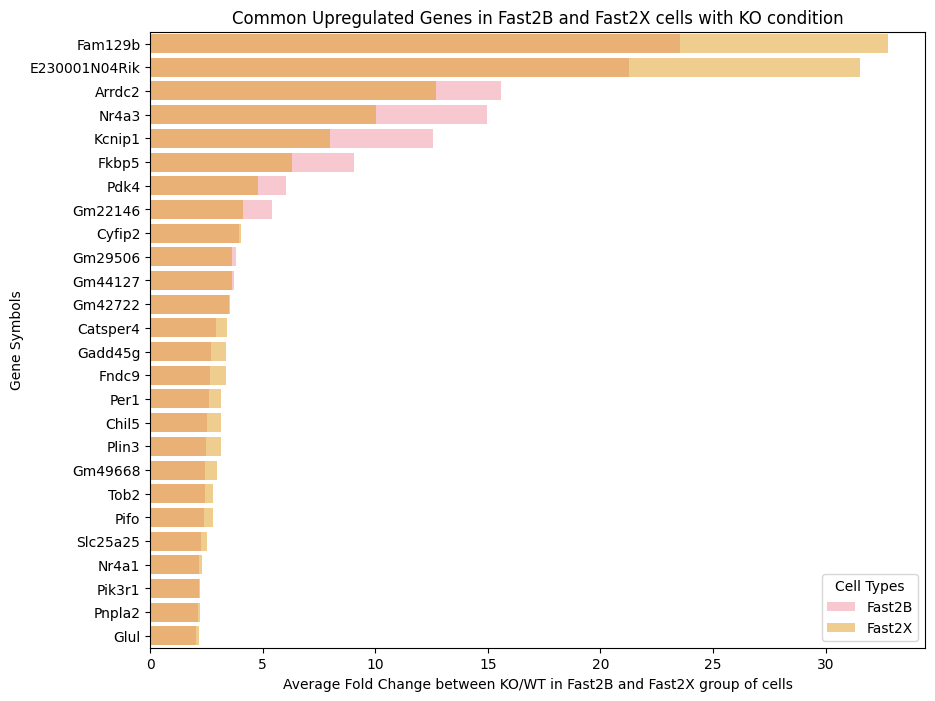

In [57]:
# plot the fold-change of common genes in Fast2B and Fast2X (stacked bar plot), where pink bar is for fast2b and orange bar is for fast2X
# get the common genes from the DEGs
degs_common_fast2B = degs_fast2B[degs_fast2B['Unnamed: 0'].isin(common_genes)]
degs_common_fast2X = degs_fast2X[degs_fast2X['Unnamed: 0'].isin(common_genes)]
# sort the common genes by fold change
degs_common_fast2B = degs_common_fast2B.sort_values('avg_FC', ascending=False)
degs_common_fast2X = degs_common_fast2X.sort_values('avg_FC', ascending=False)
#plot the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=degs_common_fast2B['avg_FC'], y=degs_common_fast2B['Unnamed: 0'], color='pink', label='Fast2B')
sns.barplot(x=degs_common_fast2X['avg_FC'], y=degs_common_fast2X['Unnamed: 0'], color='orange', label='Fast2X', alpha=0.5)
plt.xlabel("Average Fold Change between KO/WT in Fast2B and Fast2X group of cells")
plt.ylabel('Gene Symbols')
plt.title("Common Upregulated Genes in Fast2B and Fast2X cells with KO condition")
plt.legend(title='Cell Types')
plt.show()